# Source dependent analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from lstchain.reco.dl1_to_dl2 import get_source_dependent_parameters
from lstchain.io import read_configuration_file, get_standard_config
from lstchain.io.io import dl1_params_src_dep_lstcam_key, write_dataframe, dl1_params_lstcam_key
from lstchain.io.io import(
    dl1_params_lstcam_key,
    dl1_params_src_dep_lstcam_key,
    dl2_params_lstcam_key,
    dl2_params_src_dep_lstcam_key,
    write_dataframe,
)
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
camera003 = CameraGeometry.from_name('LSTCam-003')

/fefs/aswg/workspace/seiya.nozaki/Install/anaconda3/envs/lst-dev/lib/python3.7/site-packages/ctapipe/tools/stage1.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
config = read_configuration_file("../lstchain/data/lstchain_src_dep_config.json")
print(config['source_dependent'])

True


## MC point gamma

In the case of MC point gamma, expected source positions are true ones

In [3]:
dl1_filename = '/fefs/aswg/workspace/seiya.nozaki/data/MC/v0.6.3/IC6_3_trans80/DL1_raw/data/gamma_point/dl1_gamma_20deg_180deg_run1___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_4LSTs_MAGIC_mono_off0.4.h5'
dl1_params = pd.read_hdf(dl1_filename, key=dl1_params_lstcam_key)

In [4]:
src_dep_df_mc_g = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

In [5]:
src_dep_df_mc_g['on']

,expected_src_x,expected_src_y,dist,time_gradient_from_source,skewness_from_source,alpha
0,0.195476,0.0,0.113092,-5.323493,-0.375768,83.783864
1,0.195476,0.0,0.316262,-1.693643,0.265181,1.569636
2,0.195476,0.0,0.409677,1.156789,0.719113,2.476362
3,0.195476,0.0,0.960713,10.845755,0.408803,7.000391
4,0.195476,0.0,0.842521,11.593341,-0.057014,0.100079
...,...,...,...,...,...,...
2368,0.195476,0.0,0.286112,-4.145499,0.534936,5.276463
2369,0.195476,0.0,0.602784,10.437392,-0.142624,9.763087
2370,0.195476,0.0,0.789404,14.778939,0.016402,1.619481
2371,0.195476,0.0,0.176618,19.979823,-0.462755,37.046532


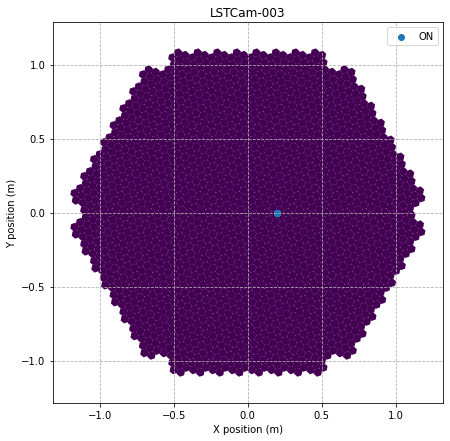

In [6]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)
plt.scatter(src_dep_df_mc_g['on'].expected_src_x, src_dep_df_mc_g['on'].expected_src_y, label='ON')
                    
plt.legend()
plt.grid(ls='--')
plt.show()

## MC proton

In the case of MC proton, expected source positions are calculated by using MC telescope pointing positions and defined nominal source position 

In [7]:
print("MC nominal source (x-axis): ", config['mc_nominal_source_x_deg'], " [deg]")
print("MC nominal source (y-axis): ", config['mc_nominal_source_y_deg'], " [deg]")

MC nominal source (x-axis):  0.4  [deg]
MC nominal source (y-axis):  0.0  [deg]


In [8]:
dl1_filename = '/fefs/aswg/workspace/seiya.nozaki/data/MC/v0.6.3/IC6_3_trans80/DL1_raw/data/proton/dl1_proton_20deg_180deg_run1___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_4LSTs_MAGIC_mono.h5'
dl1_params = pd.read_hdf(dl1_filename, key=dl1_params_lstcam_key)

In [9]:
src_dep_df_mc_p = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

In [10]:
src_dep_df_mc_p['on']

,expected_src_x,expected_src_y,dist,time_gradient_from_source,skewness_from_source,alpha
0,0.195477,2.834940e-12,1.036120,-21.223139,-0.735024,76.862415
1,0.195477,2.834940e-12,0.343332,8.413458,-0.038676,48.925764
2,0.195477,2.834940e-12,0.771197,19.193290,0.464045,46.361681
3,0.195477,2.834940e-12,0.528980,-1.104011,0.183032,77.469479
4,0.195477,2.834940e-12,0.926566,-21.904296,0.064404,77.480017
...,...,...,...,...,...,...
329,0.195477,2.834940e-12,0.950485,50.098617,-0.650784,85.391529
330,0.195477,2.834940e-12,0.777985,20.111842,-0.359201,67.021765
331,0.195477,2.834940e-12,1.163540,5.530487,-0.307056,8.716289
332,0.195477,2.834940e-12,1.229158,-8.702501,0.076893,74.529887


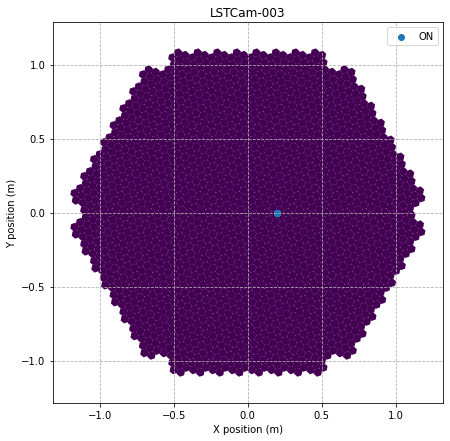

In [11]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)
plt.scatter(src_dep_df_mc_p['on'].expected_src_x, src_dep_df_mc_p['on'].expected_src_y, label='ON')
                    
plt.legend()
plt.grid(ls='--')
plt.show()

## Real data

In [12]:
dl1_filename = '/fefs/aswg/workspace/seiya.nozaki/data/Crab/201120/v0.6.3_IC10_5/DL1_raw/Run2967/dl1_LST-1.Run02967.0000.h5'
dl1_params = pd.read_hdf(dl1_filename, key=dl1_params_lstcam_key)

### wobble observation (n_off=3)

In the case of real wobble observation, expected source positions are computed by using telescope pointing position and specified source position in config

In [13]:
config['observation_mode'] = 'wobble'
config['n_off_wobble'] = 3
config['source_name'] = 'Crab'
# You need to specify the source ra/dec if source names are not registerd in astropy
# config['source_ra'] = 83.63308333 #[deg]
# config['ource_dec'] = 22.0145  #[deg]

In [14]:
src_dep_df_real_wobble3 = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

In [15]:
src_dep_df_real_wobble3

on                                                     \
      expected_src_x expected_src_y      dist time_gradient_from_source   
0           0.107900       0.156028  0.383528                  5.412105   
1           0.107900       0.156028  1.113163                 -4.494669   
2           0.107900       0.156028  0.638376                 18.384103   
3           0.107900       0.156028  1.054590                 -7.988515   
4           0.107901       0.156028  0.603266                -14.583006   
...              ...            ...       ...                       ...   
52995       0.107096       0.155854  0.257681                 -0.438552   
52996       0.107096       0.155854  0.841964                 -9.857172   
52997       0.107096       0.155854  0.818901                 16.336876   
52998       0.107096       0.155854  0.823280                 -6.215335   
52999       0.107096       0.155854  0.914936                 -0.592026   

                                             off_090                           \
      skewness_from_source      alpha expected_src_x expected_src_y      dist   
0                 0.418388  87.223966      -0.156028       0.107900  0.592598   
1                -0.496836  65.920858      -0.156028       0.107900  0.954620   
2                -0.099386  32.436563      -0.156028       0.107900  0.370344   
3                -0.031462  37.312272      -0.156028       0.107900  1.009122   
4                -0.132634   1.315633      -0.156028       0.107901  0.359886   
...                    ...        ...            ...            ...       ...   
52995            -0.354179  65.553648      -0.155854       0.107096  0.401438   
52996             0.193535  27.707580      -0.155854       0.107096  0.823326   
52997             0.002769  38.523139      -0.155854       0.107096  0.578457   
52998             0.420845  21.944522      -0.155854       0.107096  1.008906   
52999            -0.027098  33.331890      -0.155854       0.107096  0.958129   

                                 ...              off_180             \
      time_gradient_from_source  ... skewness_from_source      alpha   
0                      5.412105  ...             0.418388  40.030867   
1                     -4.494669  ...            -0.496836  67.459982   
2                     18.384103  ...            -0.099386  68.589130   
3                     -7.988515  ...            -0.031462  51.200337   
4                    -14.583006  ...            -0.132634  36.679765   
...                         ...  ...                  ...        ...   
52995                 -0.438552  ...            -0.354179  17.217398   
52996                 -9.857172  ...             0.193535  10.561704   
52997                 16.336876  ...             0.002769  11.087351   
52998                 -6.215335  ...             0.420845  47.783585   
52999                 -0.592026  ...            -0.027098  55.993710   

                       off_270                           \
      off_angle expected_src_x expected_src_y      dist   
0         180.0       0.156028      -0.107900  0.247552   
1         180.0       0.156028      -0.107900  0.931330   
2         180.0       0.156028      -0.107900  0.700515   
3         180.0       0.156028      -0.107900  0.801948   
4         180.0       0.156028      -0.107901  0.735063   
...         ...            ...            ...       ...   
52995     180.0       0.155854      -0.107096  0.045468   
52996     180.0       0.155854      -0.107096  1.104051   
52997     180.0       0.155854      -0.107096  0.950102   
52998     180.0       0.155854      -0.107096  0.632738   
52999     180.0       0.155854      -0.107096  0.647573   

                                                                           
      time_gradient_from_source skewness_from_source      alpha off_angle  
0                      5.412105             0.418388  43.140900     270.0  
1                     -4.494669            -0.496836  5

In [16]:
print("Column (Level 0): ", src_dep_df_real_wobble3.columns.levels[0])
print("Column (Level 1): ", src_dep_df_real_wobble3.columns.levels[1])

Column (Level 0):  Index(['on', 'off_090', 'off_180', 'off_270'], dtype='object')
Column (Level 1):  Index(['alpha', 'dist', 'expected_src_x', 'expected_src_y', 'off_angle',
       'skewness_from_source', 'time_gradient_from_source'],
      dtype='object')


In [17]:
src_dep_df_real_wobble3['on']

,expected_src_x,expected_src_y,dist,time_gradient_from_source,skewness_from_source,alpha
0,0.107900,0.156028,0.383528,5.412105,0.418388,87.223966
1,0.107900,0.156028,1.113163,-4.494669,-0.496836,65.920858
2,0.107900,0.156028,0.638376,18.384103,-0.099386,32.436563
3,0.107900,0.156028,1.054590,-7.988515,-0.031462,37.312272
4,0.107901,0.156028,0.603266,-14.583006,-0.132634,1.315633
...,...,...,...,...,...,...
52995,0.107096,0.155854,0.257681,-0.438552,-0.354179,65.553648
52996,0.107096,0.155854,0.841964,-9.857172,0.193535,27.707580
52997,0.107096,0.155854,0.818901,16.336876,0.002769,38.523139
52998,0.107096,0.155854,0.823280,-6.215335,0.420845,21.944522


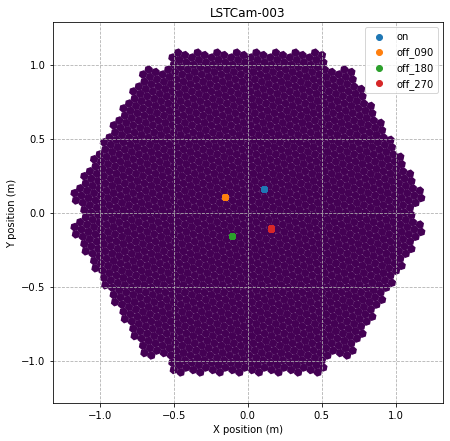

In [18]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)

for i, k in enumerate(src_dep_df_real_wobble3.columns.levels[0]):
    plt.scatter(src_dep_df_real_wobble3[k].expected_src_x, src_dep_df_real_wobble3[k].expected_src_y, label=k)
                    
plt.legend()
plt.grid(ls='--')
plt.show()

### wobble observation (n_off=5)

In [19]:
config['observation_mode'] = 'wobble'
config['n_off_wobble'] = 5
config['source_name'] = 'Crab'

In [20]:
src_dep_df_real_wobble5 = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

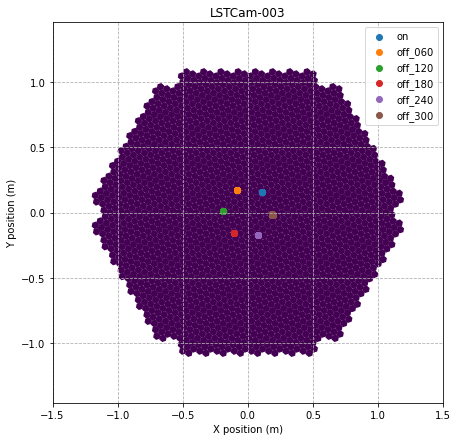

In [21]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)

for i, k in enumerate(src_dep_df_real_wobble5.columns.levels[0]):
    plt.scatter(src_dep_df_real_wobble5[k].expected_src_x, src_dep_df_real_wobble5[k].expected_src_y, label=k)
                    
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(ls='--')
plt.show()

### ON observation

In the case of real ON observation, expected source positions are always at the center of the camera

In [22]:
config['observation_mode'] = 'on'

In [23]:
src_dep_df_real_on = pd.concat(get_source_dependent_parameters(dl1_params, config), axis=1)

In [24]:
src_dep_df_real_on

on                                                     \
      expected_src_x expected_src_y      dist time_gradient_from_source   
0                0.0            0.0  0.412601                  5.412105   
1                0.0            0.0  0.923769                 -4.494669   
2                0.0            0.0  0.527210                 18.384103   
3                0.0            0.0  0.891480                 -7.988515   
4                0.0            0.0  0.546746                -14.583006   
...              ...            ...       ...                       ...   
52995            0.0            0.0  0.214125                 -0.438552   
52996            0.0            0.0  0.955320                 -9.857172   
52997            0.0            0.0  0.763475                 16.336876   
52998            0.0            0.0  0.820588                 -6.215335   
52999            0.0            0.0  0.795563                 -0.592026   

                                       
      skewness_from_source      alpha  
0                 0.418388  59.967216  
1                -0.496836  66.532714  
2                -0.099386  47.662948  
3                -0.031462  43.038415  
4                -0.132634  16.826164  
...                    ...        ...  
52995            -0.354179  19.432471  
52996             0.193535  18.026228  
52997             0.002769  25.393436  
52998             0.420845  35.154570  
52999            -0.027098  43.193516  

[53000 rows x 6 columns]

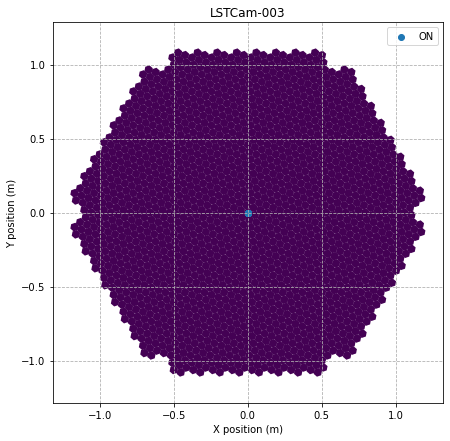

In [25]:
plt.figure(figsize=(7,7))

disp = CameraDisplay(camera003)
plt.scatter(src_dep_df_real_on['on'].expected_src_x, src_dep_df_real_on['on'].expected_src_y, label='ON')
                    
plt.legend()
plt.grid(ls='--')
plt.show()

## Read DL2 data with source-dependent parameters

In [26]:
#srcdep_df= pd.read_hdf('../temp_test/dl2_data/dl2_gamma_20deg_180deg_run1___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_4LSTs_MAGIC_mono_off0.4.h5', key=dl2_params_src_dep_lstcam_key)
dl2_srcindep_df= pd.read_hdf('/fefs/aswg/workspace/seiya.nozaki/ctasoft/demo/dl2_data/dl2_LST-1.Run03004.0000.h5', key=dl2_params_lstcam_key)
dl2_srcdep_df= pd.read_hdf('/fefs/aswg/workspace/seiya.nozaki/ctasoft/demo/dl2_data/dl2_LST-1.Run03004.0000.h5', key=dl2_params_src_dep_lstcam_key)
dl2_srcdep_df.columns = pd.MultiIndex.from_tuples([tuple(col[1:-1].replace('\'', '').replace(' ','').split(",")) for col in dl2_srcdep_df.columns])

In [27]:
dl2_srcindep_df

,intensity,log_intensity,x,y,r,phi,length,width,psi,skewness,...,log_reco_energy,reco_energy,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,reco_alt,reco_az,reco_type,gammaness
0,14540.430905,4.162577,-0.008676,0.001685,0.008838,2.949748,1.166246,1.150800,-0.115877,0.016905,...,0.580625,3.807366,-0.312348,0.021613,-0.321025,0.023298,1.415856,3.826954,101,0.340714
1,35.570989,1.551096,0.366497,-0.083203,0.375823,-0.223239,0.067199,0.058285,0.882751,-0.006956,...,-1.485000,0.032734,0.022689,0.026023,0.389186,-0.057180,1.441207,3.805761,101,0.458357
2,39.538167,1.597017,-0.216790,-0.005679,0.216865,-3.115401,0.125821,0.049277,0.759320,0.132373,...,-1.689947,0.020420,-0.021106,0.001130,-0.237896,-0.004549,1.418827,3.820490,0,0.669143
3,53.708605,1.730044,-0.189193,-0.426202,0.466307,-1.988571,0.201158,0.038839,1.102578,-0.029955,...,-1.143298,0.071896,-0.001026,-0.032274,-0.190219,-0.458476,1.419646,3.712611,0,0.603143
4,53.125977,1.725307,-0.388942,-0.276880,0.477429,-2.522938,0.117604,0.056115,0.970396,-0.084057,...,-1.686528,0.020581,-0.053554,0.078589,-0.442496,-0.198291,1.411363,3.776947,0,0.637310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45397,44.214582,1.645566,-0.804047,0.517154,0.956002,2.570021,0.115624,0.048406,0.867682,-0.068633,...,-0.668524,0.214524,0.745677,0.329385,-0.058370,0.846539,1.421992,4.028438,101,0.177643
45398,348.164149,2.541784,-0.425905,-0.746745,0.859665,-2.089128,0.367536,0.154516,-1.105042,0.546749,...,-0.828981,0.148258,-0.318936,-0.144535,-0.744841,-0.891280,1.397624,3.637396,101,0.200000
45399,32.689598,1.514410,0.404906,0.358579,0.540858,0.724794,0.077251,0.056253,-0.487096,0.050094,...,-0.910727,0.122821,0.018716,0.001003,0.423622,0.359582,1.441653,3.922971,0,0.503905
45400,40.145720,1.603639,-0.714946,0.666592,0.977493,2.391180,0.111423,0.040693,-1.404008,0.083427,...,-0.391457,0.406016,0.723549,0.203450,0.008603,0.870043,1.424160,4.037368,101,0.413071


In [28]:
dl2_srcdep_df

off_090                                                     \
      expected_src_x expected_src_y      dist time_gradient_from_source   
0          -0.059094      -0.182974  0.191418                 -0.501799   
1          -0.059094      -0.182974  0.437129               -252.000842   
2          -0.059094      -0.182974  0.237279                -34.293634   
3          -0.059094      -0.182974  0.275836                 17.866606   
4          -0.059094      -0.182974  0.342954                -11.365622   
...              ...            ...       ...                       ...   
45397      -0.058556      -0.182828  1.022610               -136.896036   
45398      -0.058556      -0.182828  0.673014                 -4.789112   
45399      -0.058556      -0.182828  0.712684                 98.430920   
45400      -0.058556      -0.182828  1.073482                 84.773488   
45401      -0.058556      -0.182828  0.396698                -21.292742   

                                                                             \
      skewness_from_source      alpha off_angle log_reco_energy reco_energy   
0                 0.016905  81.367876      90.0        0.580625    3.807366   
1                -0.006956  37.384361      90.0       -1.485000    0.032734   
2                 0.132373  88.145908      90.0       -1.689947    0.020420   
3                 0.029955   1.314784      90.0       -1.143298    0.071896   
4                 0.084057  39.708212      90.0       -1.686528    0.020581   
...                    ...        ...       ...             ...         ...   
45397            -0.068633  87.088789      90.0       -0.668524    0.214524   
45398             0.546749  59.766964      90.0       -0.828981    0.148258   
45399             0.050094  77.343979      90.0       -0.910727    0.122821   
45400            -0.083427  28.138825      90.0       -0.391457    0.406016   
45401             0.251174   8.619319      90.0       -1.363486    0.043303   

                    ...              on                                        \
      reco_disp_dx  ... log_reco_energy reco_energy reco_disp_dx reco_disp_dy   
0        -0.312348  ...        0.580625    3.807366    -0.312348     0.021613   
1         0.022689  ...       -1.363882    0.043263    -0.088876     0.194124   
2        -0.021106  ...       -1.721435    0.018992     0.023837    -0.075468   
3        -0.001026  ...       -1.006557    0.098501     0.023938    -0.061245   
4        -0.053554  ...       -1.436577    0.036595    -0.014429     0.058057   
...            ...  ...             ...         ...          ...          ...   
45397     0.745677  ...       -0.667645    0.214959    -0.411515    -0.070344   
45398    -0.318936  ...       -0.757797    0.174664     0.141646    -0.105887   
45399     0.018716  ...       -1.108241    0.077940     0.060910     0.022601   
45400     0.723549  ...       -0.591671    0.256053    -0.494688    -0.128807   
45401    -0.027398  ...       -1.336794    0.046047     0.027548     0.073273   

                                                                     
      reco_src_x reco_src_y  reco_alt   reco_az reco_type gammaness  
0      -0.321025   0.023298  1.415856  3.826954       101  0.340714  
1       0.277621   0.110921  1.437180  3.851302         0  0.516000  
2      -0.192954  -0.081147  1.420404  3.802219         0  0.662595  
3      -0.165255  -0.487447  1.420417  3.705104         0  0.590667  
4      -0.403371  -0.218823  1.412725  3.771901         0  0.617310  
...          ...        ...       ...       ...       ...       ...  
45397  -1.215562   0.446810  1.383071  3.908626       101  0.482321  
45398  -0.284259  -0.852632  1.414040  3.626827       101  0.173833  
45399   0.465815   0.381179  1.443074  3.930164         0  0.550738  
45400  -1.209634   0.537785  1.382979  3.926046       101  0.454238  
45401  -0.252676  -0.438542  1.417339  3.720465       101  0.270167  

[45402 rows x 67 columns]

In [29]:
print("Column (Level 0): ", dl2_srcdep_df.columns.levels[0])
print("Column (Level 1): ", dl2_srcdep_df.columns.levels[1])

Column (Level 0):  Index(['off_090', 'off_180', 'off_270', 'on'], dtype='object')
Column (Level 1):  Index(['alpha', 'dist', 'expected_src_x', 'expected_src_y', 'gammaness',
       'log_reco_energy', 'off_angle', 'reco_alt', 'reco_az', 'reco_disp_dx',
       'reco_disp_dy', 'reco_energy', 'reco_src_x', 'reco_src_y', 'reco_type',
       'skewness_from_source', 'time_gradient_from_source'],
      dtype='object')


In [30]:
dl2 = pd.concat([dl2_srcindep_df, dl2_srcdep_df['on']], axis=1)
dl2

,intensity,log_intensity,x,y,r,phi,length,width,psi,skewness,...,log_reco_energy,reco_energy,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,reco_alt,reco_az,reco_type,gammaness
0,14540.430905,4.162577,-0.008676,0.001685,0.008838,2.949748,1.166246,1.150800,-0.115877,0.016905,...,0.580625,3.807366,-0.312348,0.021613,-0.321025,0.023298,1.415856,3.826954,101,0.340714
1,35.570989,1.551096,0.366497,-0.083203,0.375823,-0.223239,0.067199,0.058285,0.882751,-0.006956,...,-1.363882,0.043263,-0.088876,0.194124,0.277621,0.110921,1.437180,3.851302,0,0.516000
2,39.538167,1.597017,-0.216790,-0.005679,0.216865,-3.115401,0.125821,0.049277,0.759320,0.132373,...,-1.721435,0.018992,0.023837,-0.075468,-0.192954,-0.081147,1.420404,3.802219,0,0.662595
3,53.708605,1.730044,-0.189193,-0.426202,0.466307,-1.988571,0.201158,0.038839,1.102578,-0.029955,...,-1.006557,0.098501,0.023938,-0.061245,-0.165255,-0.487447,1.420417,3.705104,0,0.590667
4,53.125977,1.725307,-0.388942,-0.276880,0.477429,-2.522938,0.117604,0.056115,0.970396,-0.084057,...,-1.436577,0.036595,-0.014429,0.058057,-0.403371,-0.218823,1.412725,3.771901,0,0.617310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45397,44.214582,1.645566,-0.804047,0.517154,0.956002,2.570021,0.115624,0.048406,0.867682,-0.068633,...,-0.667645,0.214959,-0.411515,-0.070344,-1.215562,0.446810,1.383071,3.908626,101,0.482321
45398,348.164149,2.541784,-0.425905,-0.746745,0.859665,-2.089128,0.367536,0.154516,-1.105042,0.546749,...,-0.757797,0.174664,0.141646,-0.105887,-0.284259,-0.852632,1.414040,3.626827,101,0.173833
45399,32.689598,1.514410,0.404906,0.358579,0.540858,0.724794,0.077251,0.056253,-0.487096,0.050094,...,-1.108241,0.077940,0.060910,0.022601,0.465815,0.381179,1.443074,3.930164,0,0.550738
45400,40.145720,1.603639,-0.714946,0.666592,0.977493,2.391180,0.111423,0.040693,-1.404008,0.083427,...,-0.591671,0.256053,-0.494688,-0.128807,-1.209634,0.537785,1.382979,3.926046,101,0.454238
